<a href="https://colab.research.google.com/github/anamaria1-4/GitHub-Finanzas_-Computacionales/blob/main/Copia_de_FC_Clase_MBG_OU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic process 

Asset prices have an element of randomness, commonly modeled by stochastic differential equations (SDEs). Closed-form solutions to these SDEs are available only in exceptional cases. They can serve as a validation for numerical techniques, or as building blocks for SDE asset price models of increasing complexity. 

The most commonly used asset price process in finance is the geometric Brownian Motion (GBM) model, where the logarithm of the asset price follows an arithmetic Brownian motion, driven by a Wiener process W(t).

The asset price S(t) is said to follow a GBM process, when it satisfies the following SDE:

$$ dS(t) = μS(t)dt + σS(t)dWP(t), \text{with}\  S(t_0) = S_0 $$

where: μ denotes the drift parameter, i.e. a constant deterministic growth rate of the stock, and σ is the (constant) percentage volatility parameter.

This is a short-hand notation for the integral formulation

$$ S(t) = S_0 + \int_{t_0}^{t} μ S(z) dz + \int_{t_0}^{t} σ S(z) dW(z) $$

**Definition: (Markov process)** A stochastic process is a Markov process, if the conditional probability distribution of future states depends only on the
present state, and not on the history.

In a financial setting, this implies that we assume that the current stock price contains all information of the past asset prices. The adapted stock price  process S(t) on a filtered probability space has the Markov property, if for each bounded and measurable function $g : R^N → R$.

--------------------------------------------------



## **Procesos estocásticos: ejemplos**
### Caminata aleatoria (CA)

$ X_j: 1 → 1/2\ \ \text{o} (-1) → 1/2 $, $M_0 = 0$ y $M_n = \sum_{j=1}^{n} X_j$

Los incrementos de la CA entre dos instantes $s$ y $t$  con ($s < t$) se definen como:

$$ M_t - M_s = \sum_{j=1}^{t} X_j - \sum_{j=1}^{s} X_j = \sum_{j=s+1}^{t} X_j $$.

**Propiedades:** 
1. $E(M_t - M_s) = 0$
2. $V(M_t - M_s) = V \big(\sum_{j=s+1}^{t}X_j \big)$ 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def random_walk(N, T, mu=0, sigma=1):
  '''
  Args:
      T : Duration of simulation in time steps
      N : Number of random walks
      mu : mean 
      sigma : standard deviation 
  '''
  rands = np.random.normal(mu, sigma, size=(N, T))
  # compute the cumulative sum of all the steps over the time
  sim = np.cumsum(rands, axis=1)
  return sim

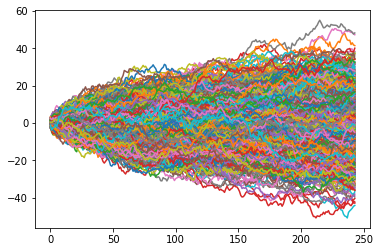

In [ ]:
sim = random_walk(1000,244,  mu=0, sigma=1)
plt.plot(np.transpose(sim));

### Movimiento Browniano: $W_t$

Un PE se dice que es un Movimiento Browniano estándar si se puede definir cómo:

$$ W_t := \lim_{n → ∞} W_n (t) $$

y $W_t$ cumple con las siguientes propiedades:

1. $W_0 = 0$
2. Para $s< t$ se tiene $W_t - W_s \sim N (0,t-s)$
3. Las trayectorias de $\{ W_t\}_{t>0}$ son continuas. 

# Movimiento geométrico Browniano - MGB

Se define el MGB como el proceso estocástico en tiempo continuo $\{S_{t}: t \geq 0\}$ que satisface la ecuación diferencial estocástica:

$$ dS(t) = μS(t)dt + σS(t)dW(t), \text{with}\  S(t_0) = S_0 $$

Además, puede ser escrito como

$$ S(t) = S_0 \exp\{(μ - 1/2σ^2) t + σ W(t) \}$$

i. Media: $E(S_t) = S_0 e^{\mu t}$

ii. Varianza: $V(S_t) = S_0^2 e^{2\mu t} (e^{\sigma^2 t}-1)$.

Para más detalles  [(ver)](https://en.wikipedia.org/wiki/Geometric_Brownian_motion).

### Movimiento aritmético Browniano - ABM

La transformación logaritmica de $S(t)$, ($X(t)$) sigue el proceso estocástico

$$ dX(t) = μ dt + σ dW(t), \text{with}\  X(t_0) = log (S_0) $$

Además, puede ser escrito como:
$$ X(t) = X_0 + \{(μ - 1/2σ^2) t + σ W(t) \}$$

y, cómo $X(t) = log (S(t))$, entonces:

$$ X(t) \sim N (X_0 +(μ - 1/2σ^2) t;  σ^2 t)$$


In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [ ]:
T = 1 # Duración (1 año)?
mu = 0.05
sigma = 0.2 # Tasa de crecimiento. 20%
S0 = 100
NS = 1000 # Trayectrias
M = 252
St = PathsGBM(S0,mu,sigma,T,NS,M)
#St
#St = St["S"]

Text(0, 0.5, 'S(t)')

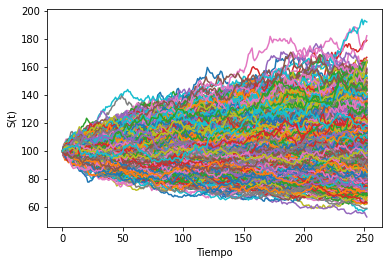

In [ ]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

In [ ]:
St[:,252].mean()  # El valor esperado diario de la variable es de 104.46

105.32924773801562

In [ ]:
St[:,-1].mean()  # El ultimo valor esperado de la variable

105.32924773801562

In [ ]:
S0 * np.exp(mu * T) 

105.12710963760242

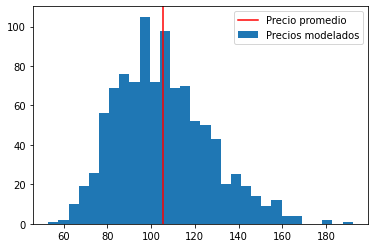

In [ ]:
# Precio modelado en T
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio') # No es simetrico. Es la distribución log normal. Se verifica el comportamineto del modelo
plt.legend() # Verificar con el feed que es un distribución normal 

In [ ]:
# Comparación con un precio de referencia. # Activo contingente: seguro, derivado (instrumentos financieros derivados. El valor del derivado depende del comportamineto subyacente), acción, bono, comodities o coberturas. Es cuya dinamica depende del estado de la naturaleza que se este representando. 
K=110
payoff = St[:,-1]-K
payoff.mean()

-4.67075226198437

In [ ]:
# Prob de que St > K
Stsup = St[:,252] > K
Stsup = pd.DataFrame(Stsup)
Stsup.value_counts()

False    631
True     369
dtype: int64

# Ornstein-Uhlenbeck (OU) process 

El proceso OU es un proceso estacionario de Markov que satisface la ecuación diferencial estocástica:

$$ d X_t = k(\mu - X_t)dt + \sigma dW_t $$ 

El proceso OU también se puede considerar como análogo al proceso AR(1).

i. Media: $E(X_t) = X_0 e^{-k t} +\mu (1-e^{-k t})$

ii. Varianza: $V(S_t) = \sigma^2/2k (1-e^{-2k t})$.

Para más detalles  [(ver)](https://en.wikipedia.org/wiki/Geometric_Brownian_motion).

In [ ]:
t_0 = 0 # Inicial  
T = 1
steps = 252
k = 1 # Largo plazo 
mu = 0.8
sigma = 0.3 # Variabilidad del 30% de la tasa de interes. 

t = np.linspace(t_0,T,steps) # time axis
dt = np.mean(np.diff(t))
y = np.zeros(steps)

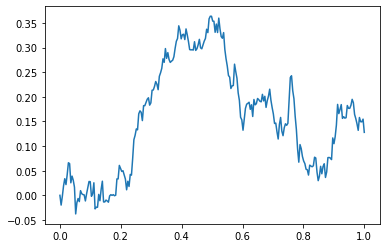

In [ ]:
y0 = np.random.normal(0,1) # initial condition. Tasa de crecimiento corregida 
drift = lambda y,t: k*(mu-y) # define drift term, google to learn about lambda. Sigma escalado en el tiempo 
diffusion = lambda y,t: sigma # define diffusion term. Tasa de variabilidad

noise = np.random.normal(0,1,steps)*np.sqrt(dt) 
# solve SDE
for i in range(1,steps):
 y[i] = y[i-1] + drift(y[i-1],i*dt)*dt + diffusion(y[i-1],i*dt)*noise[i]

plt.plot(t,y); # No tiene una tendencia marcada, tiene un comportamiento de reversión hacua el valor de largo plazo. Si arranca en 2 converge hacia el valor de largo plazo, en este caso 1. ¿cómo saber si es de reversión o ? Y cual escoger? Depende de la variable. Debe tener propiedades para saber si es estacionaria (rversión) y si no es estacionaria (movimiento geometrico bowiniano) 

# Función de autocorrelación: total (ACF) y parcial (PACF)

[*********************100%***********************]  1 of 1 completed


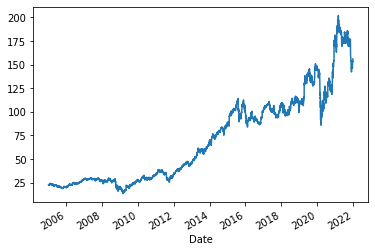

In [ ]:
assets = ["DIS"]
data = yf.download(assets,start="2005-01-01",end="2021-12-31")
precios = data.loc[:,"Adj Close"]
precios.plot()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(precios, lags=30)

In [ ]:
# Test Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
# Prueba sobre los precios de AAPL
pruebadf1 = adfuller(precios)  
pruebadf1

(-0.43091094740201036,
 0.9048084256096236,
 24,
 4254,
 {'1%': -3.4318881406494235,
  '5%': -2.8622196656114536,
  '10%': -2.567131791330442},
 14755.046923072336)

In [ ]:
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -0.430911
P-value: 0.904808
Citical values:
	1%: -3.431888
	5%: -2.862220
	10%: -2.567132
